In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import torch.optim as optim
from torch.autograd import Variable
from data_processor import EyeDataset
from torch.nn.functional import log_softmax

In [2]:
num_epochs = 10
num_classes = 5
learning_rate = 0.001

### Load the data

In [47]:
eye_dataset = EyeDataset('../classification_data/dataset/train')
print(len(eye_dataset), 'training examples')

data_loader = torch.utils.data.DataLoader(dataset=eye_dataset, batch_size=10, shuffle=True)


# index = 0
for img, label in data_loader:
    print(label.shape, img.shape)
#     index += 1

2421 training examples
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 1

torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([10]) torch.Size([10, 3, 140, 250])
torch.Size([1

## Todo: Data Augmentation

### Define the model (add batch norm, dropout, etc later)

In [26]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        NUM_CLASSES = 5
        
        # input shape: [3, 140, 250]
        # conv --> relu
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(5, 5), stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)


        
        
        # input shape: [16, 140, 250]
        # conv --> relu --> max pool
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(5, 5), stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        
        # input shape: [16, 70, 125]
        # conv --> relu --> max pool
#         self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(5,5), stride=1, padding=0)
#         self.relu3 = nn.ReLU()
#         self.pool2 = nn.MaxPool2d(kernel_size=5)
        
        # input shape: [16, 14, 25]
        self.linear = nn.Linear(30208, NUM_CLASSES)
        # minibatch size = 10
#         self.output = nn.Linear(10, 1)
        
    def forward(self, x):

#         print(x.shape)
        x = self.conv1(x)
#         print(x.shape)
        x = self.relu1(x)
#         print(x.shape)
        x = self.pool1(x)
#         print(x.shape)

        
        x = self.conv2(x)
#         print(x.shape)
        x = self.relu2(x)
#         print(x.shape)
        x = self.pool2(x)
#         print(x.shape)
        
        
        # flatten
        x = x.view(x.shape[0], -1)
#         print(x.shape)
        output = self.linear(x)
#         print(output.shape)
        
        return output

In [39]:
model = ConvNet()
print(model)

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=30208, out_features=5, bias=True)
)


### Experiment with different optimizers

In [40]:
LR = 0.001
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

### Train and Test

Epoch [1/5], Step [10/243], Loss: 1.6211
9
Epoch [1/5], Step [20/243], Loss: 1.6073
19
Epoch [1/5], Step [30/243], Loss: 1.5910
29
Epoch [1/5], Step [40/243], Loss: 1.5513
39
Epoch [1/5], Step [50/243], Loss: 1.4986
49
Epoch [1/5], Step [60/243], Loss: 1.0206
59
Epoch [1/5], Step [70/243], Loss: 0.4280
69
Epoch [1/5], Step [80/243], Loss: 0.0560
79
Epoch [1/5], Step [90/243], Loss: 0.0288
89
Epoch [1/5], Step [100/243], Loss: 0.0609
99
Epoch [1/5], Step [110/243], Loss: 0.0240
109
Epoch [1/5], Step [120/243], Loss: 0.0620
119
Epoch [1/5], Step [130/243], Loss: 0.0930
129
Epoch [1/5], Step [140/243], Loss: 0.1048
139
Epoch [1/5], Step [150/243], Loss: 0.1492
149
Epoch [1/5], Step [160/243], Loss: 0.0306
159
Epoch [1/5], Step [170/243], Loss: 0.0285
169
Epoch [1/5], Step [180/243], Loss: 0.5430
179
Epoch [1/5], Step [190/243], Loss: 0.0644
189
Epoch [1/5], Step [200/243], Loss: 0.0157
199
Epoch [1/5], Step [210/243], Loss: 0.0229
209
Epoch [1/5], Step [220/243], Loss: 0.0789
219
Epoch [1

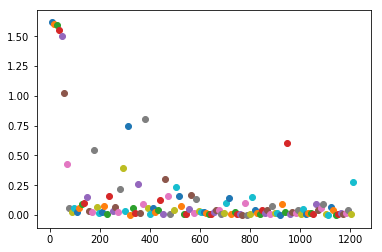

In [41]:
# Train the model
total_step = len(data_loader)

num_epochs = 5

x = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(data_loader):
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#         plt.scatter(x, loss.item())
        
#         x += 1
#         print((epoch) * total_step + i)

#         plt.scatter((epoch) * total_step + i, loss.item())
        
        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            print(((epoch) * total_step + i))
            plt.scatter((epoch) * total_step + i, loss.item())

plt.show()

### Test the model

10 10 1.0
20 20 1.0
30 30 1.0
40 40 1.0
49 50 0.98
58 60 0.9666666666666667
68 70 0.9714285714285714
77 80 0.9625
87 90 0.9666666666666667
97 100 0.97
107 110 0.9727272727272728
117 120 0.975
127 130 0.9769230769230769
137 140 0.9785714285714285
147 150 0.98
156 160 0.975
166 170 0.9764705882352941
176 180 0.9777777777777777
186 190 0.9789473684210527
196 200 0.98
206 210 0.9809523809523809
215 220 0.9772727272727273
225 230 0.9782608695652174
235 240 0.9791666666666666
245 250 0.98
254 260 0.9769230769230769
263 270 0.9740740740740741
273 280 0.975
281 290 0.9689655172413794
291 300 0.97
301 310 0.9709677419354839
311 320 0.971875
320 330 0.9696969696969697
330 340 0.9705882352941176
339 350 0.9685714285714285
349 360 0.9694444444444444
359 370 0.9702702702702702
369 380 0.9710526315789474
379 390 0.9717948717948718
389 400 0.9725
399 410 0.973170731707317
409 420 0.9738095238095238
419 430 0.9744186046511628
429 440 0.975
438 450 0.9733333333333334
448 460 0.9739130434782609
457 470 

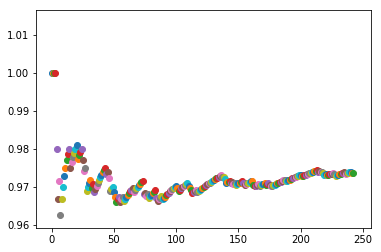

In [42]:
# Test the model
test_dataset = EyeDataset('../classification_data/dataset/validation')
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10, shuffle=True)


model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    
    for i, (images, labels) in enumerate(data_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        print(correct, total, correct / total)
        plt.scatter(i, correct / total)
        
    plt.show()


In [46]:
torch.save(model, 'model.pickle')

/anaconda3/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
